In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/fz/m07b538j77x820by11vzx2d40000gn/T/ipykernel_42932/4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949494e+07,1.949494e+07,False,NaN,1,NaN,NaN,None,2023-09-24T20:38:00.000Z,26475.670415,7.578957e+09,-0.4166,-0.049354,-0.469601,-0.115233,1.782273,-10.436299,-12.296708,5.161415e+11,49.1606,5.559891e+11,None,2023-09-24T20:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 20:41:59.155538
1,1027,Ethereum,ETH,ethereum,7431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202300e+08,1.202300e+08,True,NaN,2,NaN,NaN,None,2023-09-24T20:38:00.000Z,1589.114430,2.752527e+09,25.8633,0.123831,-0.315316,-2.290688,-3.527461,-15.560638,-14.263424,1.910592e+11,18.1999,1.910592e+11,None,2023-09-24T20:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 20:41:59.155538
2,825,Tether USDt,USDT,tether,62748,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320374e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-24T20:38:00.000Z,1.000108,1.234311e+10,-0.8361,-0.009858,-0.000055,-0.031778,0.054886,0.000549,-0.013544,8.321276e+10,7.9240,8.643556e+10,None,2023-09-24T20:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 20:41:59.155538
3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538474e+08,1.538474e+08,False,NaN,4,NaN,NaN,None,2023-09-24T20:38:00.000Z,209.545365,2.331944e+08,6.6158,-0.097895,-0.551653,-3.028730,-3.643055,-12.521409,-11.011899,3.223800e+10,3.0709,3.223800e+10,None,2023-09-24T20:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 20:41:59.155538
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-24T20:38:00.000Z,0.505816,3.776732e+08,-3.4037,-0.317632,-0.743407,1.860179,-3.360079,-29.872228,5.795723,2.693227e+10,2.5655,5.058156e+10,None,2023-09-24T20:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 20:41:59.155538
5,3408,USD Coin,USDC,usd-coin,14220,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.577861e+10,2.577861e+10,False,NaN,6,NaN,NaN,None,2023-09-24T20:38:00.000Z,1.000032,1.679251e+09,-7.0542,-0.010457,-0.003828,-0.022988,-0.008928,-0.002044,-0.006869,2.577945e+10,2.4549,2.577945e+10,None,2023-09-24T20:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 20:41:59.155538
6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411425e+11,1.411425e+11,True,NaN,7,NaN,NaN,None,2023-09-24T20:38:00.000Z,0.061111,1.056668e+08,-10.9711,-0.310588,-0.821123,-0.872415,-2.478449,-22.564359,-5.715226,8.625414e+09,0.8216,8.625413e+09,None,2023-09-24T20:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 20:41:59.155538
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511837e+10,3.619858e+10,False,NaN,8,NaN,NaN,None,2023-09-24T20:38:00.000Z,0.244482,6.857013e+07,-8.1481,-0.145640,-0.707106,-1.248610,-5.928096,-20.851597,-12.773360,8.585792e+09,0.8176,1.100167e+10,None,2023-09-24T20:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 20:41:59.155538
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-h

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile("/Users/donovanrodriguez/Documents/Python/API/API.csv"):
        df.to_csv("/Users/donovanrodriguez/Documents/Python/API/API.csv", header='column_names')
    else:
        df.to_csv("/Users/donovanrodriguez/Documents/Python/API/API.csv", mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv("/Users/donovanrodriguez/Documents/Python/API/API.csv")

# If that didn't work try using the local host URL as shown in the video

In [52]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(30) #sleep for 1 minute
exit()

/var/folders/fz/m07b538j77x820by11vzx2d40000gn/T/ipykernel_42932/1256002287.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [54]:
df21 = pd.read_csv("/Users/donovanrodriguez/Documents/Python/API/API.csv")
df21

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10477,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19495006.00000,19495006.00000,False,NaN,1,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,26455.27048,7558389316.86278,1.14440,-0.10356,-0.45144,-0.07906,1.58004,-10.24425,-12.48021,515745656781.25549,49.09780,555560680125.28003,NaN,2023-09-24T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 23:16:24.048804
1,1,1027,Ethereum,ETH,ethereum,7431,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120230003.64229,120230003.64229,True,NaN,2,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,1586.67702,2801588366.54676,32.82310,-0.02573,-0.33252,-1.92833,-4.01072,-15.36279,-14.53027,190766183570.44080,18.16900,190766183570.44000,NaN,2023-09-24T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 23:16:24.048804
2,2,825,Tether USDt,USDT,tether,62748,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83203741768.41498,86426198725.00061,True,NaN,3,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,1.00023,12315820433.54320,1.07690,0.01151,-0.00340,-0.02705,0.05481,0.01408,0.01075,83222515161.29768,7.92420,86445699205.98000,NaN,2023-09-24T23:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 23:16:24.048804
3,3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847345.62785,153847345.62785,False,NaN,4,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,209.51582,236324888.23813,10.14220,-0.03972,-0.44305,-3.16732,-3.92289,-12.50025,-11.25240,32233452294.96502,3.07000,32233452294.97000,NaN,2023-09-24T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 23:16:24.048804
4,4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,0.50616,373367726.20801,-2.52860,-0.04204,-0.18571,2.81667,-3.77656,-29.59946,5.50313,26950686675.91308,2.56680,50616142476.33000,NaN,2023-09-24T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 23:16:24.048804
5,5,3408,USD Coin,USDC,usd-coin,14222,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25779642024.38414,25779642024.38414,False,NaN,6,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,1.00020,1679018762.79932,-5.50440,0.00756,0.00182,-0.01640,0.00262,0.00856,0.01048,25784728692.74666,2.45510,25784728692.75000,NaN,2023-09-24T23:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 23:16:24.048804
6,6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141143626383.70520,141143626383.70520,True,NaN,7,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,0.06107,106680776.98183,-8.96060,-0.04092,-0.59766,-0.57818,-3.11473,-22.10727,-5.33389,8619382401.61669,0.82090,8619382401.62000,NaN,2023-09-24T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 23:16:24.048804
7,7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35118366113.23400,36198584811.42400,False,NaN,8,NaN,NaN,NaN,2023-09-24T23:14:00.000Z,0.24453,69444555.04058,0.56200,-0.17159,-0.49411,-0.88227,-6.22814,-20.55246,-12.68823,8587379666.75696,0.81770,11003703411.43000,NaN,2023-0

In [55]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19496612.00000,19496612.00000,False,NaN,1,NaN,NaN,None,2023-09-26T19:49:00.000Z,26233.08097,9708158841.21546,-23.00060,0.29240,-0.31464,-3.47546,0.42507,-10.50761,-12.63131,511456201210.25159,48.94510,550894700341.54004,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
1,1027,Ethereum,ETH,ethereum,7440,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120232366.36038,120232366.36038,True,NaN,2,NaN,NaN,None,2023-09-26T19:49:00.000Z,1588.07562,3462839676.69885,-25.30010,0.22383,-0.10443,-3.37428,-4.08056,-15.29456,-13.18188,190938090189.12640,18.27230,190938090189.13000,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
2,825,Tether USDt,USDT,tether,62842,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83207883380.70059,86426198724.99622,True,NaN,3,NaN,NaN,None,2023-09-26T19:48:00.000Z,0.99955,16803998241.62846,-12.48510,-0.01598,-0.04142,-0.06959,0.00044,-0.04482,-0.04963,83170044191.89232,7.95920,86386895991.67000,None,2023-09-26T19:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 19:50:41.784312
3,1839,BNB,BNB,bnb,1639,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847113.26845,153847113.26845,False,NaN,4,NaN,NaN,None,2023-09-26T19:49:00.000Z,212.01609,602665322.62292,66.32730,0.16466,1.06410,-2.31772,-3.14683,-12.67685,-6.59142,32618063920.44407,3.12150,32618063920.44000,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-26T19:49:00.000Z,0.50513,764782231.09862,-10.44490,0.17645,-0.09356,-1.90512,-3.93482,-29.10901,10.41577,26895561435.76882,2.57380,50512611644.52000,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
5,3408,USDC,USDC,usd-coin,14231,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25626660290.26643,25626660290.26643,False,NaN,6,NaN,NaN,None,2023-09-26T19:48:00.000Z,1.00006,2622808647.78973,-11.69150,-0.00696,-0.01343,-0.00617,0.00179,0.00251,0.01738,25628232465.65214,2.45260,25628232465.65000,None,2023-09-26T19:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-26 19:50:41.784312
6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35125265157.66200,36198584811.42400,False,NaN,7,NaN,NaN,None,2023-09-26T19:48:00.000Z,0.24472,107847966.28161,-5.03850,0.22378,-0.09666,-4.34611,-6.95348,-21.33191,-7.77594,8595931221.63501,0.82260,11012497791.47000,None,2023-09-26T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141168296383.70523,141168296383.70523,True,NaN,8,NaN,NaN,None,2023-09-26T19:49:00.000Z,0.06038,110038455.88092,-17.59380,0.25333,-0.93968,-3.59240,-4.34562,-21.96529,-2.31317,8524164859.49810,0.81570,8524164859.50000,None,2023-09-26T19

In [49]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19496612.00000,19496612.00000,False,NaN,1,NaN,NaN,None,2023-09-26T19:49:00.000Z,26233.08097,9708158841.21546,-23.00060,0.29240,-0.31464,-3.47546,0.42507,-10.50761,-12.63131,511456201210.25159,48.94510,550894700341.54004,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
1,1027,Ethereum,ETH,ethereum,7440,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120232366.36038,120232366.36038,True,NaN,2,NaN,NaN,None,2023-09-26T19:49:00.000Z,1588.07562,3462839676.69885,-25.30010,0.22383,-0.10443,-3.37428,-4.08056,-15.29456,-13.18188,190938090189.12640,18.27230,190938090189.13000,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
2,825,Tether USDt,USDT,tether,62842,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83207883380.70059,86426198724.99622,True,NaN,3,NaN,NaN,None,2023-09-26T19:48:00.000Z,0.99955,16803998241.62846,-12.48510,-0.01598,-0.04142,-0.06959,0.00044,-0.04482,-0.04963,83170044191.89232,7.95920,86386895991.67000,None,2023-09-26T19:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 19:50:41.784312
3,1839,BNB,BNB,bnb,1639,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847113.26845,153847113.26845,False,NaN,4,NaN,NaN,None,2023-09-26T19:49:00.000Z,212.01609,602665322.62292,66.32730,0.16466,1.06410,-2.31772,-3.14683,-12.67685,-6.59142,32618063920.44407,3.12150,32618063920.44000,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-26T19:49:00.000Z,0.50513,764782231.09862,-10.44490,0.17645,-0.09356,-1.90512,-3.93482,-29.10901,10.41577,26895561435.76882,2.57380,50512611644.52000,None,2023-09-26T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
5,3408,USDC,USDC,usd-coin,14231,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25626660290.26643,25626660290.26643,False,NaN,6,NaN,NaN,None,2023-09-26T19:48:00.000Z,1.00006,2622808647.78973,-11.69150,-0.00696,-0.01343,-0.00617,0.00179,0.00251,0.01738,25628232465.65214,2.45260,25628232465.65000,None,2023-09-26T19:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-26 19:50:41.784312
6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35125265157.66200,36198584811.42400,False,NaN,7,NaN,NaN,None,2023-09-26T19:48:00.000Z,0.24472,107847966.28161,-5.03850,0.22378,-0.09666,-4.34611,-6.95348,-21.33191,-7.77594,8595931221.63501,0.82260,11012497791.47000,None,2023-09-26T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 19:50:41.784312
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141168296383.70523,141168296383.70523,True,NaN,8,NaN,NaN,None,2023-09-26T19:49:00.000Z,0.06038,110038455.88092,-17.59380,0.25333,-0.93968,-3.59240,-4.34562,-21.96529,-2.31317,8524164859.49810,0.81570,8524164859.50000,None,2023-09-26T19

In [56]:
# Now let's look at the coin trends over time

df3 = df21.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.10365,-0.47504,-0.25074,1.49916,-10.23685,-12.49500
Ethereum,-0.03492,-0.35560,-1.99926,-4.06433,-15.36184,-14.47166
Tether USDt,-0.00628,-0.00534,-0.01779,0.05175,-0.00585,0.00085
BNB,-0.04354,-0.39485,-3.11994,-3.88999,-12.49329,-11.01105
XRP,-0.07341,-0.25502,2.52385,-3.78409,-29.53566,5.72533
USD Coin,-0.00744,-0.00199,-0.00237,0.00019,-0.00099,0.00850
Dogecoin,-0.01771,-0.65563,-0.72308,-3.16442,-22.08142,-5.18216
Cardano,-0.16309,-0.52474,-1.07043,-6.28795,-20.59661,-12.42864
Solana,0.02982,0.03358,3.25464,-4.59284,-23.26824,19.95419


In [57]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.10365
             quote.USD.percent_change_24h    -0.47504
             quote.USD.percent_change_7d     -0.25074
             quote.USD.percent_change_30d     1.49916
             quote.USD.percent_change_60d   -10.23685
             quote.USD.percent_change_90d   -12.49500
Ethereum     quote.USD.percent_change_1h     -0.03492
             quote.USD.percent_change_24h    -0.35560
             quote.USD.percent_change_7d     -1.99926
             quote.USD.percent_change_30d    -4.06433
             quote.USD.percent_change_60d   -15.36184
             quote.USD.percent_change_90d   -14.47166
Tether USDt  quote.USD.percent_change_1h     -0.00628
             quote.USD.percent_change_24h    -0.00534
             quote.USD.percent_change_7d     -0.01779
             quote.USD.percent_change_30d     0.05175
             quote.USD.percent_change_60d    -0.00585
             quote.USD.percent_change_90

In [58]:
type(df4)

pandas.core.series.Series

In [59]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.10365
            quote.USD.percent_change_24h  -0.47504
            quote.USD.percent_change_7d   -0.25074
            quote.USD.percent_change_30d   1.49916
            quote.USD.percent_change_60d -10.23685
            quote.USD.percent_change_90d -12.49500
Ethereum    quote.USD.percent_change_1h   -0.03492
            quote.USD.percent_change_24h  -0.35560
            quote.USD.percent_change_7d   -1.99926
            quote.USD.percent_change_30d  -4.06433
            quote.USD.percent_change_60d -15.36184
            quote.USD.percent_change_90d -14.47166
Tether USDt quote.USD.percent_change_1h   -0.00628
            quote.USD.percent_change_24h  -0.00534
            quote.USD.percent_change_7d   -0.01779
            quote.USD.percent_change_30d   0.05175
            quote.USD.percent_change_60d  -0.00585
            quote.USD.percent_change_90d   0.00085
BNB         quote.USD.percent_change_1h   -0.04354
            quote.USD.percent_change_24h  -0.39485
            quote.USD.percent_change_7d   -3.11994
            quote.USD.percent_change_30d  -3.88999
            quote.USD.percent_change_60d -12.49329
            quote.USD.percent_change_90d -11.01105
XRP         quote.USD.percent_change_1h   -0.07341
            quote.USD.percent_change_24h  -0.25502
            quote.USD.percent_change_7d    2.52385
            quote.USD.percent_change_30d  -3.78409
            quote.USD.percent_change_60d -29.53566
            quote.USD.percent_change_90d   5.72533
USD Coin    quote.USD.percent_change_1h   -0.00744
            quote.USD.percent_change_24h  -0.00199
            quote.USD.percent_change_7d   -0.00237
            quote.USD.percent_change_30d   0.00019
            quote.USD.percent_change_60d  -0.00099
            quote.USD.percent_change_90d   0.00850
Dogecoin    quote.USD.percent_change_1h   -0.01771
            quote.USD.percent_change_24h  -0.65563
            quote.USD.percent_change_7d   -0.72308
            quote.USD.percent_change_30d  -3.16442
            quote.USD.percent_change_60d -22.08142
            quote.USD.percent_change_90d  -5.18216
Cardano     quote.USD.percent_change_1h   -0.16309
            quote.USD.percent_change_24h  -0.52474
            quote.USD.percent_change_7d   -1.07043
            quote.USD.percent_change_30d  -6.28795
            quote.USD.percent_change_60d -20.59661
            quote.USD.percent_change_90d -12.42864
Solana      quote.USD.percent_change_1h    0.02982
            quote.USD.percent_change_24h   0.03358
            quote.USD.percent_change_7d    3.25464
            quote.USD.percent_change_30d  -4.59284
            quote.USD.percent_change_60d -23.26824
            quote.USD.percent_change_90d  19.95419
Toncoin     quote.USD.percent_change_1h   -0.14488
            quote.USD.percent_change_24h  -3.51031
            quote.USD.percent_change_7d   -4.26537
            quote.USD.percent_change_30d  54.57918
            quote.USD.percent_change_60d  62.79395
            quote.USD.percent_change_90d  54.44830
TRON        quote.USD.percent_change_1h   -0.12789
            quote.USD.percent_change_24h   0.35759
            quote.USD.percent_change_7d    0.64526
            quote.USD.percent_change_30d   8.79038
            quote.USD.percent_change_60d   1.73188
            quote.USD.percent_change_90d  13.96357
Dai         quote.USD.percent_change_1h   -0.01839
            quote.USD.percent_change_24h  -0.01993
            quote.USD.percent_change_7d   -0.02148
            quote.USD.percent_change_30d  -0.03443
            quote.USD.percent_change_60d  -0.00171
            quote.USD.percent_change_90d   0.00495
Polkadot    quote.USD.percent_change_1h   -0.02179
            quote.USD.percent_change_24h  -0.25433
            quote.USD.percent_change_7d   -1.34158
            quote.USD.percent_change_30d -10.41309
            quote.USD.percent_change_60d -23.33503
            quo

In [60]:
df5.count()

values    96
dtype: int64

In [61]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10365
1,Bitcoin,quote.USD.percent_change_24h,-0.47504
2,Bitcoin,quote.USD.percent_change_7d,-0.25074
3,Bitcoin,quote.USD.percent_change_30d,1.49916
4,Bitcoin,quote.USD.percent_change_60d,-10.23685
5,Bitcoin,quote.USD.percent_change_90d,-12.49500
6,Ethereum,quote.USD.percent_change_1h,-0.03492
7,Ethereum,quote.USD.percent_change_24h,-0.35560
8,Ethereum,quote.USD.percent_change_7d,-1.99926
9,Ethereum,quote.USD.percent_change_30d,-4.06433


In [62]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10365
1,Bitcoin,quote.USD.percent_change_24h,-0.47504
2,Bitcoin,quote.USD.percent_change_7d,-0.25074
3,Bitcoin,quote.USD.percent_change_30d,1.49916
4,Bitcoin,quote.USD.percent_change_60d,-10.23685
5,Bitcoin,quote.USD.percent_change_90d,-12.49500
6,Ethereum,quote.USD.percent_change_1h,-0.03492
7,Ethereum,quote.USD.percent_change_24h,-0.35560
8,Ethereum,quote.USD.percent_change_7d,-1.99926
9,Ethereum,quote.USD.percent_change_30d,-4.06433


In [63]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1,-0.10365
1,Bitcoin,24h,-0.47504
2,Bitcoin,7d,-0.25074
3,Bitcoin,30d,1.49916
4,Bitcoin,60d,-10.23685
5,Bitcoin,90d,-12.49500
6,Ethereum,1,-0.03492
7,Ethereum,24h,-0.35560
8,Ethereum,7d,-1.99926
9,Ethereum,30d,-4.06433


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

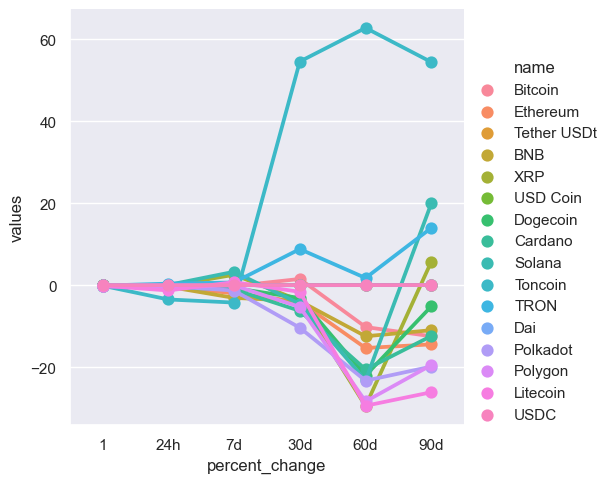

In [64]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [65]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df21[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26455.27048,2023-09-24 23:16:24.048804
15,Bitcoin,26455.27048,2023-09-24 23:16:29.595358
30,Bitcoin,26455.27048,2023-09-24 23:16:35.033845
45,Bitcoin,26455.27048,2023-09-24 23:16:40.493160
60,Bitcoin,26455.27048,2023-09-24 23:16:45.946175
75,Bitcoin,26455.27048,2023-09-24 23:16:51.391595
90,Bitcoin,26455.27048,2023-09-24 23:16:56.942466
105,Bitcoin,26455.27048,2023-09-24 23:17:02.412741
120,Bitcoin,26455.27048,2023-09-24 23:17:09.435889
135,Bitcoin,26455.27048,2023-09-24 23:17:14.888501


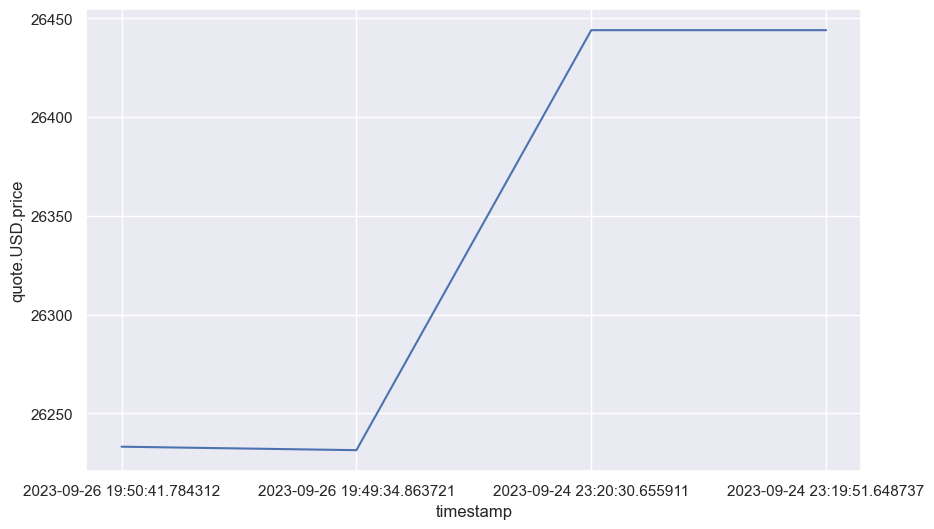

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'timestamp' column in descending order
df10_sorted = df10.sort_values(by='timestamp', ascending=False)

# Select the last 10 rows
df_last_10 = df10_sorted.head(4)

# Create the line plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_last_10)

# Show the plot
plt.show()


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

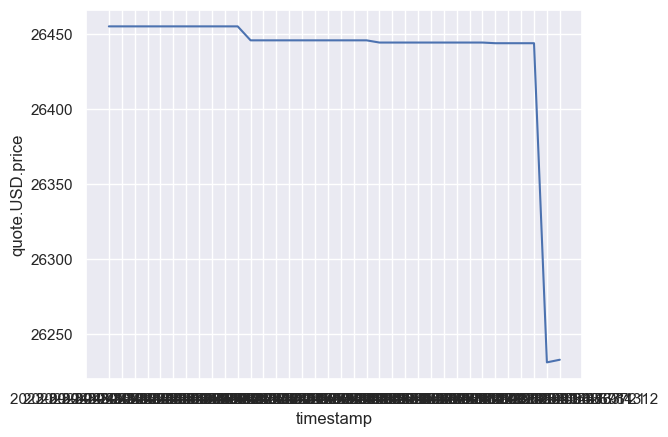

In [70]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)